In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:60% !important; }</style>"))

In [2]:
import warnings                                # 경고 메세지를 출력하고 싶지 않을 경우 import 한다.
warnings.filterwarnings('ignore')              # 경고 메세지를 출력하지 않는다. 경고 메세지를 보고싶다면 default로 지정한다.\
from IPython.display import Image              # 쥬피터 노트북에 이미지를 출력하기 위해 import 한다.
import numpy as np                             # 배열 계산 도구
import pandas as pd                            # 데이터 분석 도구
import matplotlib.pyplot as plt                # 시각화 도구
plt.rcParams['font.family'] = 'NanumGothic'    # matplotlib의 글꼴
plt.rcParams['font.size'] = 12                 # matplotlib의 글꼴 크기
import matplotlib as mpl                       # matplotlib에서 음수 데이터의 '-' 글꼴이 깨지는 것을 방지하기 위해 import 한다.
mpl.rcParams['axes.unicode_minus'] = False     # 글꼴을 깨지지 않게 한다.
import seaborn as sns                          # matplotlib를 기반으로 한 시각화 도구
from plotnine import *                         # R의 ggpolot2 패키지를 사용하는 것처럼 사용하는 시각화 도구
import missingno as msno                       # NaN 분포를 그래프 형태로 시각화하는 도구
import folium                                  # 지도 시각화 도구

서울시 공무원의 업무 추진비를 분석한 공무원 맛집 찾기
서울시는 업무 추진에 대한 비용 집행의 투명성을 제공하고자 공개된 시장단을 비롯해 4급 부서장 이상의 간부직 공무원의
업무 추진비 집행 내역을 공개한다.
서울시 업무 추진비 url => https://opengov.seoul.go.kr/expense

In [3]:
# read_csv() 함수에 index_col 옵션을 사용하면 인덱스에도 열 이름을 붙일 수 있다.
df = pd.read_csv('./data/raw.csv', index_col='연번')
df

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소
연번,,,,,,,,,
1,서울특별시장,카드,시정 관련 간담회 등,시장 등 12명,행정국 총무과,344000.0,시정 정책추진 자문 간담회,2018-01-19 20:41,동신참치양재직(서초구 강남대로 213)
2,서울특별시장,카드,시정 관련 간담회 등,"시장, 청년단체 등 38명",행정국 총무과,450000.0,시정 청년 정책 의견수렴 간담회,2018-01-23 19:06,서울시청구내식당 ( 중구 세종대로 110)
3,서울특별시장,카드,시정 관련 간담회 등,시장 등 8명,행정국 총무과,226000.0,시정 주요 경제정책 현안추진 의견수렴 간담회,2018-01-29 20:13,한뫼촌(종로구 북촌로)
4,서울특별시장,카드,시정 관련 간담회 등,시장 등 11명,행정국 총무과,324500.0,시정종교계 의견수렴 간담회,2018-01-12 09:09,서울시청구내식당(중구 세종대로 110)
5,서울특별시장,카드,시정 관련 간담회 등,시장 등 25명,행정국 총무과,737500.0,시정 정책 추진 의견수렴 간담회,2018-01-12 09:10,서울시청구내식당(중구 세종대로 110)
...,...,...,...,...,...,...,...,...,...
39,시민건강국,카드,NaN,보건의료정책 직원 4명,시민건강국 보건의료정책과,110000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-29 13:23,올리브네트웍스 (중구 세종대로 16길)
40,시민건강국,카드,NaN,시민건강국장 외 7명,시민건강국 보건의료정책과,118000.0,2017년 신년업무보고 계획 논의 간담회비 지급,2016-12-29 21:19,남도한식고운님 (중구 세종대로 82)
41,시민건강국,카드,NaN,시민건강국장 외 6명,시민건강국 보건의료정책과,174000.0,시민건강국 간부 송년 오찬간담회비 지급,2016-12-30 13:04,춘산에프앤비 (중구 태평로1가 84)


In [4]:
df.head()

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소
연번,,,,,,,,,
1,서울특별시장,카드,시정 관련 간담회 등,시장 등 12명,행정국 총무과,344000.0,시정 정책추진 자문 간담회,2018-01-19 20:41,동신참치양재직(서초구 강남대로 213)
2,서울특별시장,카드,시정 관련 간담회 등,"시장, 청년단체 등 38명",행정국 총무과,450000.0,시정 청년 정책 의견수렴 간담회,2018-01-23 19:06,서울시청구내식당 ( 중구 세종대로 110)
3,서울특별시장,카드,시정 관련 간담회 등,시장 등 8명,행정국 총무과,226000.0,시정 주요 경제정책 현안추진 의견수렴 간담회,2018-01-29 20:13,한뫼촌(종로구 북촌로)
4,서울특별시장,카드,시정 관련 간담회 등,시장 등 11명,행정국 총무과,324500.0,시정종교계 의견수렴 간담회,2018-01-12 09:09,서울시청구내식당(중구 세종대로 110)
5,서울특별시장,카드,시정 관련 간담회 등,시장 등 25명,행정국 총무과,737500.0,시정 정책 추진 의견수렴 간담회,2018-01-12 09:10,서울시청구내식당(중구 세종대로 110)


In [5]:
df.tail()

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소
연번,,,,,,,,,
39,시민건강국,카드,NaN,보건의료정책 직원 4명,시민건강국 보건의료정책과,110000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-29 13:23,올리브네트웍스 (중구 세종대로 16길)
40,시민건강국,카드,NaN,시민건강국장 외 7명,시민건강국 보건의료정책과,118000.0,2017년 신년업무보고 계획 논의 간담회비 지급,2016-12-29 21:19,남도한식고운님 (중구 세종대로 82)
41,시민건강국,카드,NaN,시민건강국장 외 6명,시민건강국 보건의료정책과,174000.0,시민건강국 간부 송년 오찬간담회비 지급,2016-12-30 13:04,춘산에프앤비 (중구 태평로1가 84)
42,시민건강국,카드,NaN,보건의료정책과 직원,시민건강국 보건의료정책과,30000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-30 13:13,스타벅스 (중구 을지로 19)
43,시민건강국,카드,NaN,보건의료정책과 직원,시민건강국 보건의료정책과,40000.0,보건의료정책과 2016년 종무식 추진관련 직원격려물품 구입비 지급,2016-12-30 13:04,스타벅스 (중구 을지로 19)


In [6]:
df.dtypes

1소속부서     object
결제방법      object
구분        object
대상인원      object
부서명       object
집행금액     float64
집행목적      object
집행일시      object
집행장소      object
dtype: object

<AxesSubplot:>

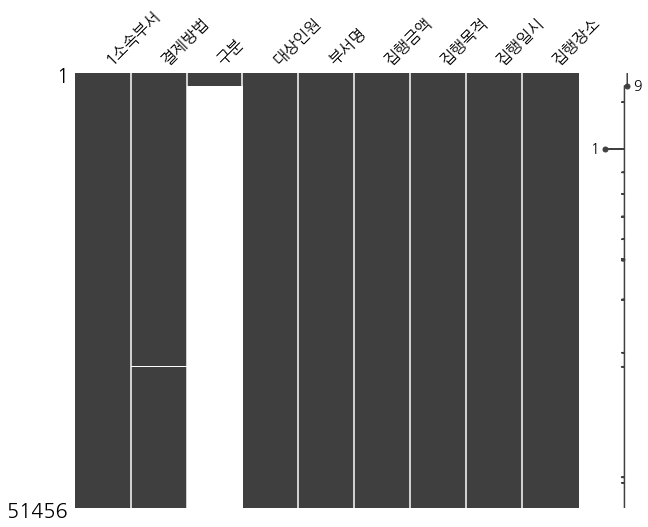

In [7]:
msno.matrix(df, figsize=(10,8))

In [8]:
df.isnull().sum()

1소속부서        0
결제방법       177
구분       49977
대상인원         8
부서명          2
집행금액         1
집행목적        16
집행일시         1
집행장소        35
dtype: int64

In [9]:
# 집행금액에 NaN 데이터가 있다. 확인해보자
df[df['집행금액'].isnull()]

,1소속부서,결제방법,구분,대상인원,부서명,집행금액,집행목적,집행일시,집행장소
연번,,,,,,,,,
해당년월 해당과에 등록된 업무추진비가 없습니다. 2016년 10월 이전의 업무추진비는 상세집행내역을 이용하세요.,서울혁신기획관,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
missing_df_row = df[df['집행금액'].isnull()].index[0]
missing_df_row

'해당년월 해당과에 등록된 업무추진비가 없습니다. 2016년 10월 이전의 업무추진비는 상세집행내역을 이용하세요.'

In [11]:
# 해당 행을 제거하고 다시 df 데이터프레임으로 저장한다.
print(df.shape)
df = df.drop(missing_df_row)
print(df.shape)

(51456, 9)
(51455, 9)


In [12]:
# 집행일시 열을 이용해서 '연', '월', '연월', '일', '시', '분', '요일' 파생 변수를 만든다.
# 판다스에서 to_datetime() 함수를 이용하면 문자열 형태의 데이터를 날짜/시간 형태의 데이터로 변환할 수 있다.
df['집행일시'] = pd.to_datetime(df['집행일시'])
df['연'] = df['집행일시'].dt.year.astype(int)
df['월'] = df['집행일시'].dt.month.astype(int)
df['연월'] = df['연'].astype(str) + '-' + df['월'].astype(str)
df['일'] = df['집행일시'].dt.day.astype(int)
df['시'] = df['집행일시'].dt.hour.astype(int)
df['분'] = df['집행일시'].dt.minute.astype(int)
df['요일'] = df['집행일시'].dt.dayofweek.astype(int) # 0 => 월요일, 1 => 화, 2 => 수, 3 => 목, 4 => 금, 5 => 토, 6 => 일

In [13]:
df.dtypes

1소속부서            object
결제방법             object
구분               object
대상인원             object
부서명              object
집행금액            float64
집행목적             object
집행일시     datetime64[ns]
집행장소             object
연                 int32
월                 int32
연월               object
일                 int32
시                 int32
분                 int32
요일                int32
dtype: object

In [14]:
from datetime import datetime as dt
print(dt.now())

2021-10-20 21:45:31.651478


<AxesSubplot:xlabel='연', ylabel='count'>

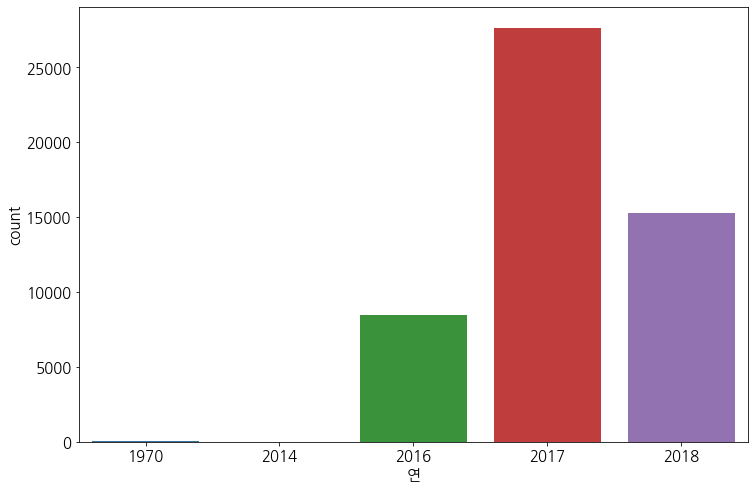

In [19]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rc('font', size=15)
sns.countplot(data=df, x='연')

<AxesSubplot:xlabel='월', ylabel='count'>

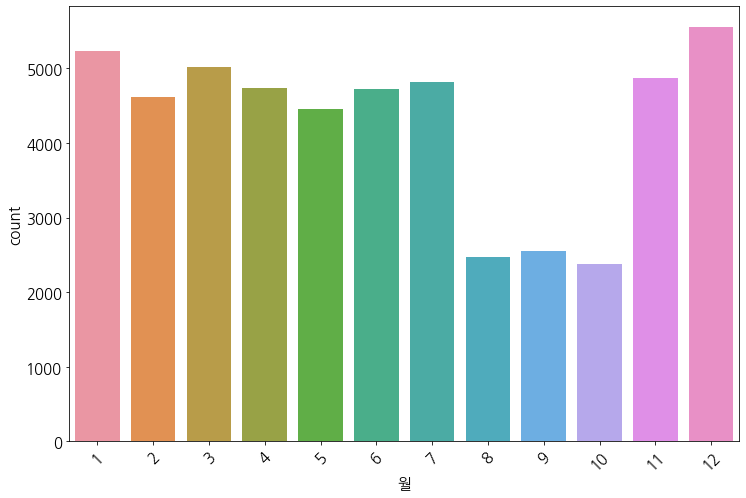

In [20]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rc('font', size=15)
plt.xticks(rotation=45)
sns.countplot(data=df, x='월')